 Food_Data_Prediction  CSE 445 section 07

#### Kanij Fatema Mahi, ID:1912159642

In [62]:
import pandas as pd

In [63]:
df = pd.read_csv("Food.csv")

In [64]:
df.head(15)

,food_name,rating,food_price,vendor,location,cuisine_type,main_ingridinet,serving_size
0,beef_bhuna,3.9,229,Shopnar Shopno,shewrapara,local,beef,NaN
1,egg_omlet,3.9,57,Shopnar Shopno,shewrapara,local,egg,NaN
2,special_naan,4.3,30,Star Kabab & Restaurant,banani,local,flour,NaN
3,deshi_chicken_jhal_fry,4.3,140,Star Kabab & Restaurant,banani,local,chicken,NaN
4,basmati_kacchi,4.3,460,Sultan's dine,Bashundhara R/A,biriyani,mutton,NaN
5,morog_polao,4.3,299,Sultan's dine,Bashundhara R/A,biriyani,chicken,NaN
6,mutton_tehari,4.3,230,Sultan's dine,Bashundhara R/A,biriyani,mutton,NaN
7,beef_rezala,4.3,200,Sultan's dine,Bashundhara R/A,local,beef,NaN
8,chicken_roast,4.3,150,Sultan's dine,Bashundhara R/A,local,chicken,NaN
9,jali_kabab,4.3,60,Sultan's dine,Bashundhara R/A,local,beef,NaN


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   food_name        699 non-null    object 
 1   rating           699 non-null    float64
 2   food_price       699 non-null    int64  
 3   vendor           699 non-null    object 
 4   location         699 non-null    object 
 5   cuisine_type     698 non-null    object 
 6   main_ingridinet  610 non-null    object 
 7   serving_size     0 non-null      float64
dtypes: float64(2), int64(1), object(5)
memory usage: 43.8+ KB


In [66]:
df.shape

(699, 8)

In [67]:
df.describe()

,rating,food_price,serving_size
count,699.000000,699.000000,0.0
mean,4.186695,314.935622,NaN
std,0.351473,233.685374,NaN
min,3.000000,18.000000,NaN
25%,4.000000,165.000000,NaN
50%,4.300000,250.000000,NaN
75%,4.500000,397.000000,NaN
max,4.700000,2600.000000,NaN


In [68]:
df.isnull().any()

food_name          False
rating             False
food_price         False
vendor             False
location           False
cuisine_type        True
main_ingridinet     True
serving_size        True
dtype: bool

In [69]:
df.drop('serving_size', axis=1, inplace=True)

In [70]:
df.isnull().any()

food_name          False
rating             False
food_price         False
vendor             False
location           False
cuisine_type        True
main_ingridinet     True
dtype: bool

In [71]:
df.describe()

,rating,food_price
count,699.000000,699.000000
mean,4.186695,314.935622
std,0.351473,233.685374
min,3.000000,18.000000
25%,4.000000,165.000000
50%,4.300000,250.000000
75%,4.500000,397.000000
max,4.700000,2600.000000


**Importing libraries**

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


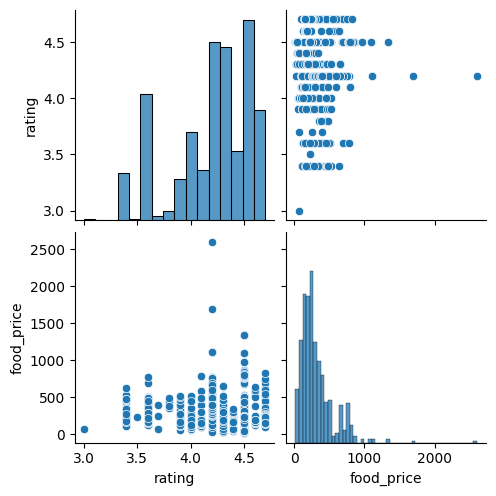

In [73]:
sns.pairplot(df)

Separating numeric and categoric columns




In [74]:
number_col = df.select_dtypes('number')
categoric_col = df.select_dtypes('O')
for cat in categoric_col.columns:
  print(categoric_col[cat].unique())

['beef_bhuna' 'egg_omlet' 'special_naan' 'deshi_chicken_jhal_fry'
 'basmati_kacchi' 'morog_polao' 'mutton_tehari' 'beef_rezala'
 'chicken_roast' 'jali_kabab' 'plain_polao' 'firni' 'borhani'
 'zafrani_sarbat' 'chui_jhal_gosto' 'badam_sarbat' 'jorda'
 'big_king_chicken' "chick'N_crisp" 'creamy_cheese_burger'
 'crispy_king_chicken_burger' 'double_whopper' 'fish_n_crisp_burger'
 'incredible_crispy_king' 'long_cheese_burger' 'long_chicken'
 'premium_salmon_burger' 'quad_beef_stacker' 'salmon_caramelized_burger'
 'tartar_crispy_chicken_burger' 'tendercrisp' 'triple_beef_stacker'
 'triple_whopper_cheese' 'whopper' 'fish_n_crisp_burrito'
 'crispy_chicken_salad' 'crunchy_garden_salad' 'chicken_tenders'
 'crispy_fried_chicken' 'chicken_nuggets' 'fish_n_fries' 'fish_n_rice'
 'french_fries' 'biriyani' 'cheddar_cream' 'mac_n_cheese' 'tender_beef'
 'deep_sea_fantasy' 'four_flavour' 'bbq_meat_machine' 'kebab_cocktail'
 'meat_masala' 'meaty_onion' 'suasage_carnival' 'bbq_beef_burger'
 'cheese_beef_bur

Numeric data points

rating
Skewness:  -0.725


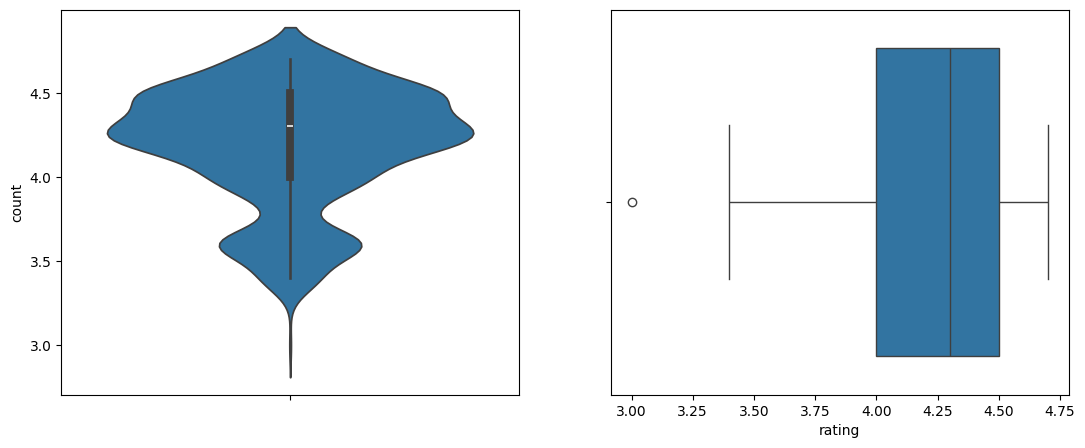

In [75]:
for i in number_col.columns:
  if i!='food_price':
    print(i)
    print("Skewness: ", round(df[i].skew(),3))

    ### ploting the column

    plt.figure(figsize=(13,5))
    plt.subplot(1,2,1)
    sns.violinplot(df[i])
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=df[i])
    plt.show()

In [76]:
categoric_col.head()

,food_name,vendor,location,cuisine_type,main_ingridinet
0,beef_bhuna,Shopnar Shopno,shewrapara,local,beef
1,egg_omlet,Shopnar Shopno,shewrapara,local,egg
2,special_naan,Star Kabab & Restaurant,banani,local,flour
3,deshi_chicken_jhal_fry,Star Kabab & Restaurant,banani,local,chicken
4,basmati_kacchi,Sultan's dine,Bashundhara R/A,biriyani,mutton


food_name

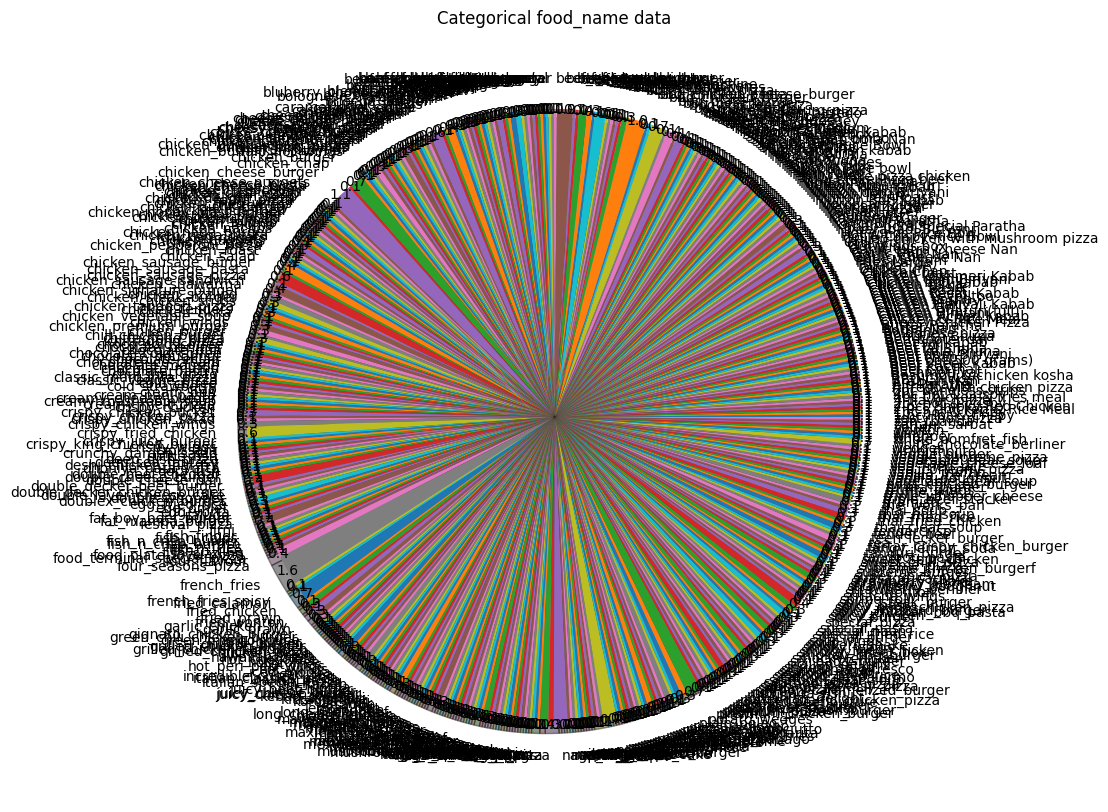

In [77]:
labels, counts = np.unique(df.food_name, return_counts=True)
plt.figure(figsize=(10,10))
plt.pie(counts,autopct='%1.1f', labels=labels, pctdistance=1, shadow=True, counterclock=True)
plt.title('Categorical food_name data')
plt.show()

vendor

['3 Food' 'Alfresco' 'American blend pizzas' 'BFC' 'Bangaliana Bhoj'
 'Barcode Cafe' 'Burger King' 'Burger Xpress' 'BurgerX' 'Chillox'
 'Dokhina Kitchen' 'Food Chemistry Rooftop Cafe' 'Food Plate'
 'Food Terminal' 'Haji Biriyani' 'Herfy' 'KFC' 'Kabab Pora Restaurant'
 'Kacchi Bhai' "Khana's" 'Le Delicia' 'Le Metro' 'Lecker'
 'Magpie Restaurant' 'Pizza Best' 'Pizza Hut' 'Pizza Inn' 'PizzaBurg'
 'Shopnar Shopno' 'Star Kabab & Restaurant' 'Street Oven' "Sultan's dine"
 'Takeout' 'burger King' 'pizzaBurg']


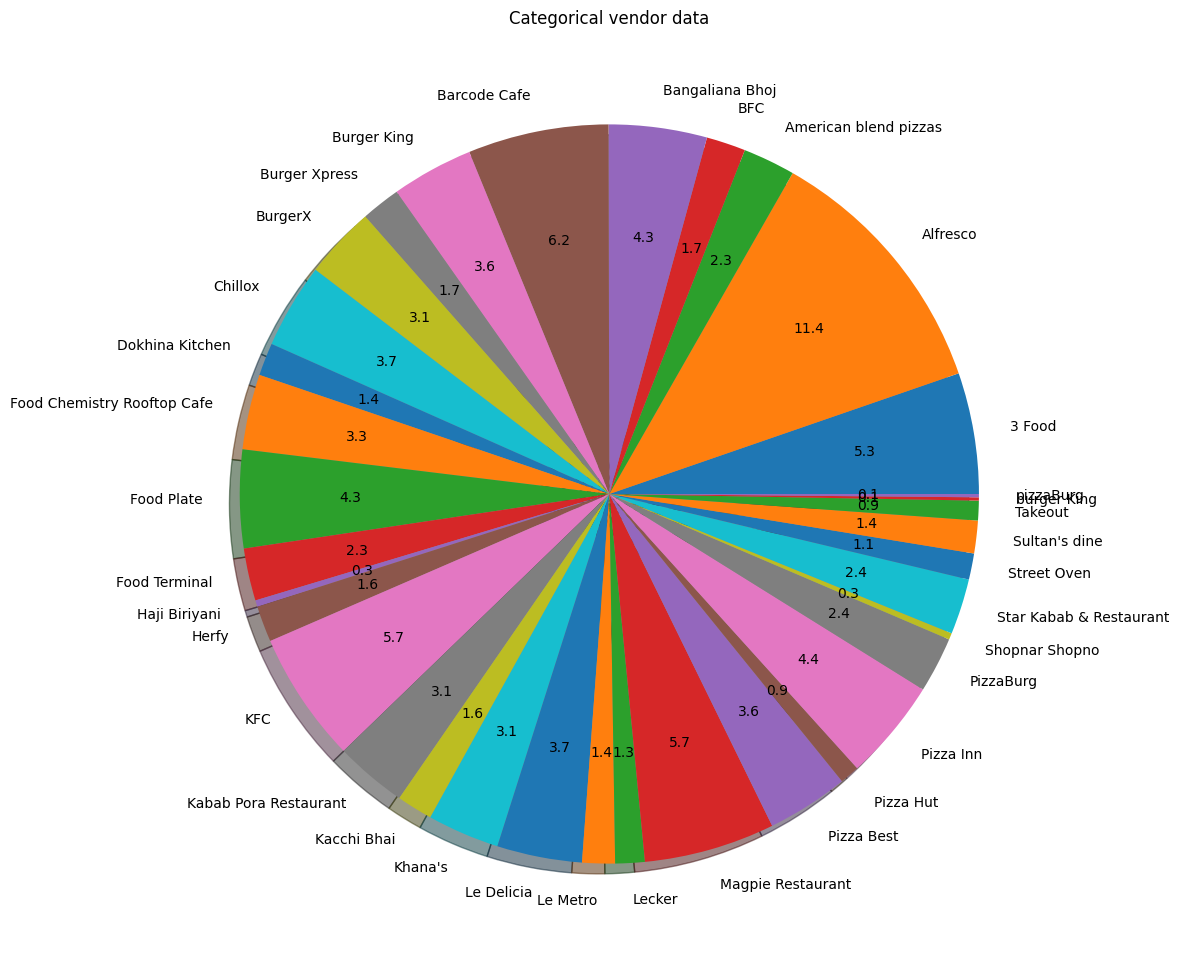

In [78]:
labels, counts = np.unique(df.vendor, return_counts=True)
print(labels)
plt.figure(figsize=(12,12))
plt.pie(counts,autopct='%1.1f', labels=labels, pctdistance=0.7, shadow=True, counterclock=True)
plt.title('Categorical vendor data')
plt.show()

location

['Banani' 'Bashundhara R/A' 'Elephant Road' 'Gulshan' 'Ibrahimpur'
 'Khilgaon' 'Mirpur' 'Muirpur' 'Shewrapara' 'Shonir Akhra' 'banani'
 'shewrapara']


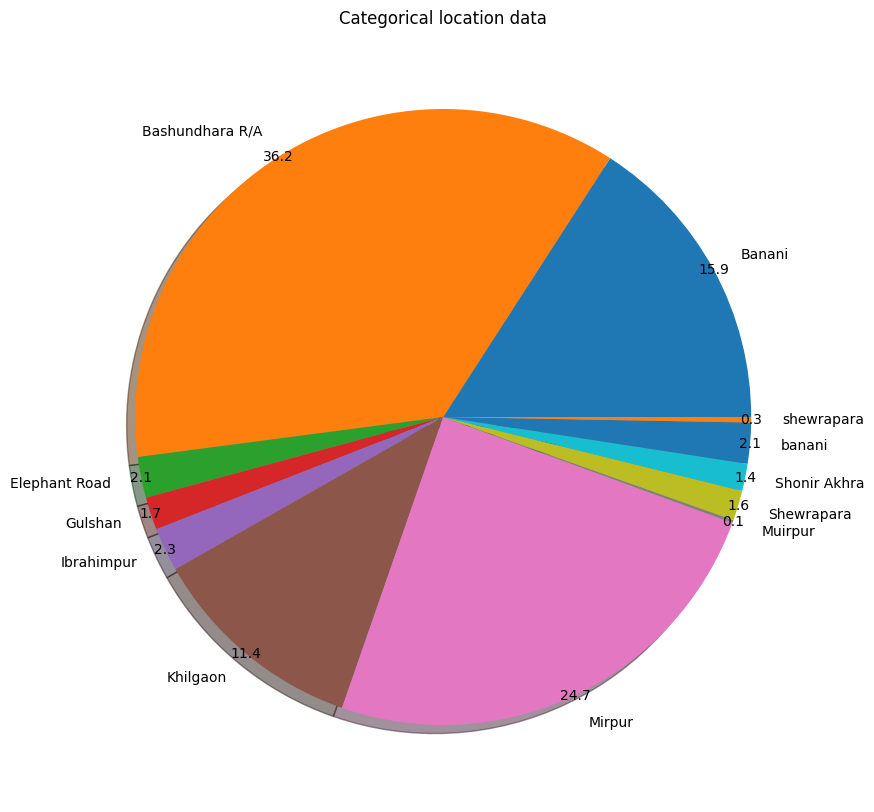

In [79]:
labels, counts = np.unique(df.location, return_counts=True)
print(labels)
plt.figure(figsize=(10,10))
plt.pie(counts,autopct='%1.1f', labels=labels, pctdistance=1, shadow=True, counterclock=True)
plt.title('Categorical location data')
plt.show()

cuisin_type

['Beef curry' 'Biriyani' 'Burger' 'Curry' 'Drinks' 'Fast Food' 'Fast food'
 'Kabab' 'Khicuri' 'Nan' 'Paratha' 'Pizza' 'Rice' 'Set meal' 'Shakes'
 'Snacks' 'beverage' 'biriyani' 'burger' 'burrito' 'chowmine' 'dessert'
 'fast_food' 'kabab' 'local' 'main_course' 'nan' 'pasta' 'pastra' 'pizza'
 'salad' 'shakes' 'shawarma' 'side' 'soup']


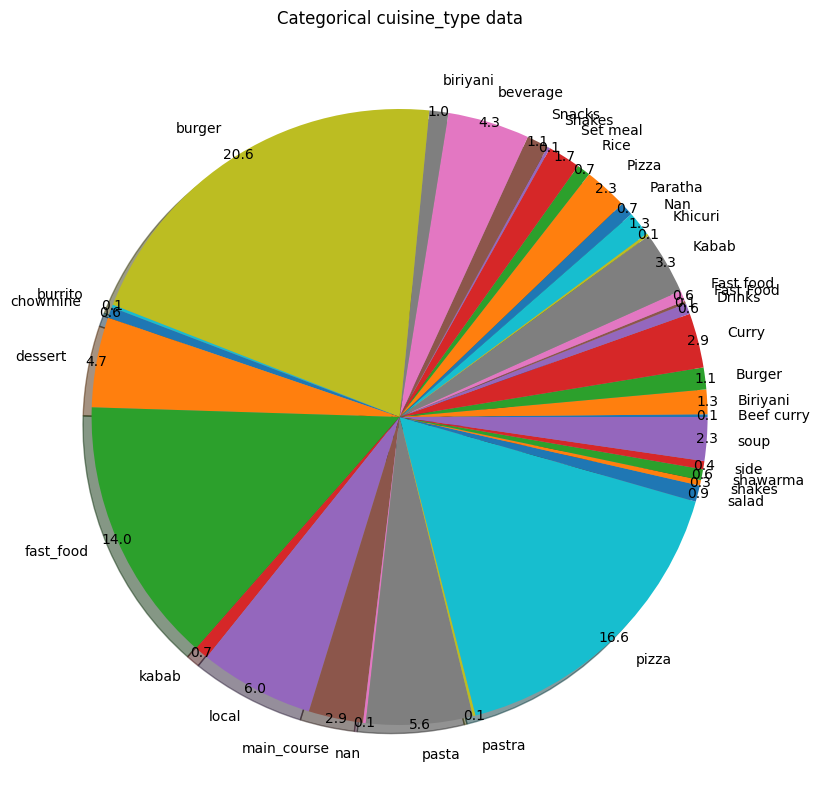

In [80]:
df['cuisine_type'] = df['cuisine_type'].astype(str) 
labels, counts = np.unique(df.cuisine_type, return_counts=True)
print(labels)
plt.figure(figsize=(10,10))
plt.pie(counts,autopct='%1.1f', labels=labels, pctdistance=1, shadow=True, counterclock=True)
plt.title('Categorical cuisine_type data')
plt.show()

main ingredient

['Beef' 'Beef & Cinigura Rice' 'Beef & dal' 'Boal Fish' 'Chicken'
 'Chicken & Rice' 'Chicken& Rice' 'Curry' 'Duck' 'Elish fish' 'Fish'
 'Flour' 'Koel meat' 'Mutton' 'Mutton & Rice' 'Pabda Fish' 'Potato'
 'Prawn' 'Rice' 'Rui Fish' 'Rupchada Fish' 'Rupchada fish' 'Sea fish'
 'beef' 'beef_chicken' 'chciken' 'cheese' 'chiciken' 'chicken' 'chocolate'
 'coffee' 'cold_coffee' 'egg' 'fish' 'flour' 'fruit' 'ice_cream'
 'lemon_soda' 'mutton' 'nan' 'potato' 'rice' 'sea_food' 'soft_drink'
 'soft_drinks' 'tea' 'vanilla' 'yogurt']


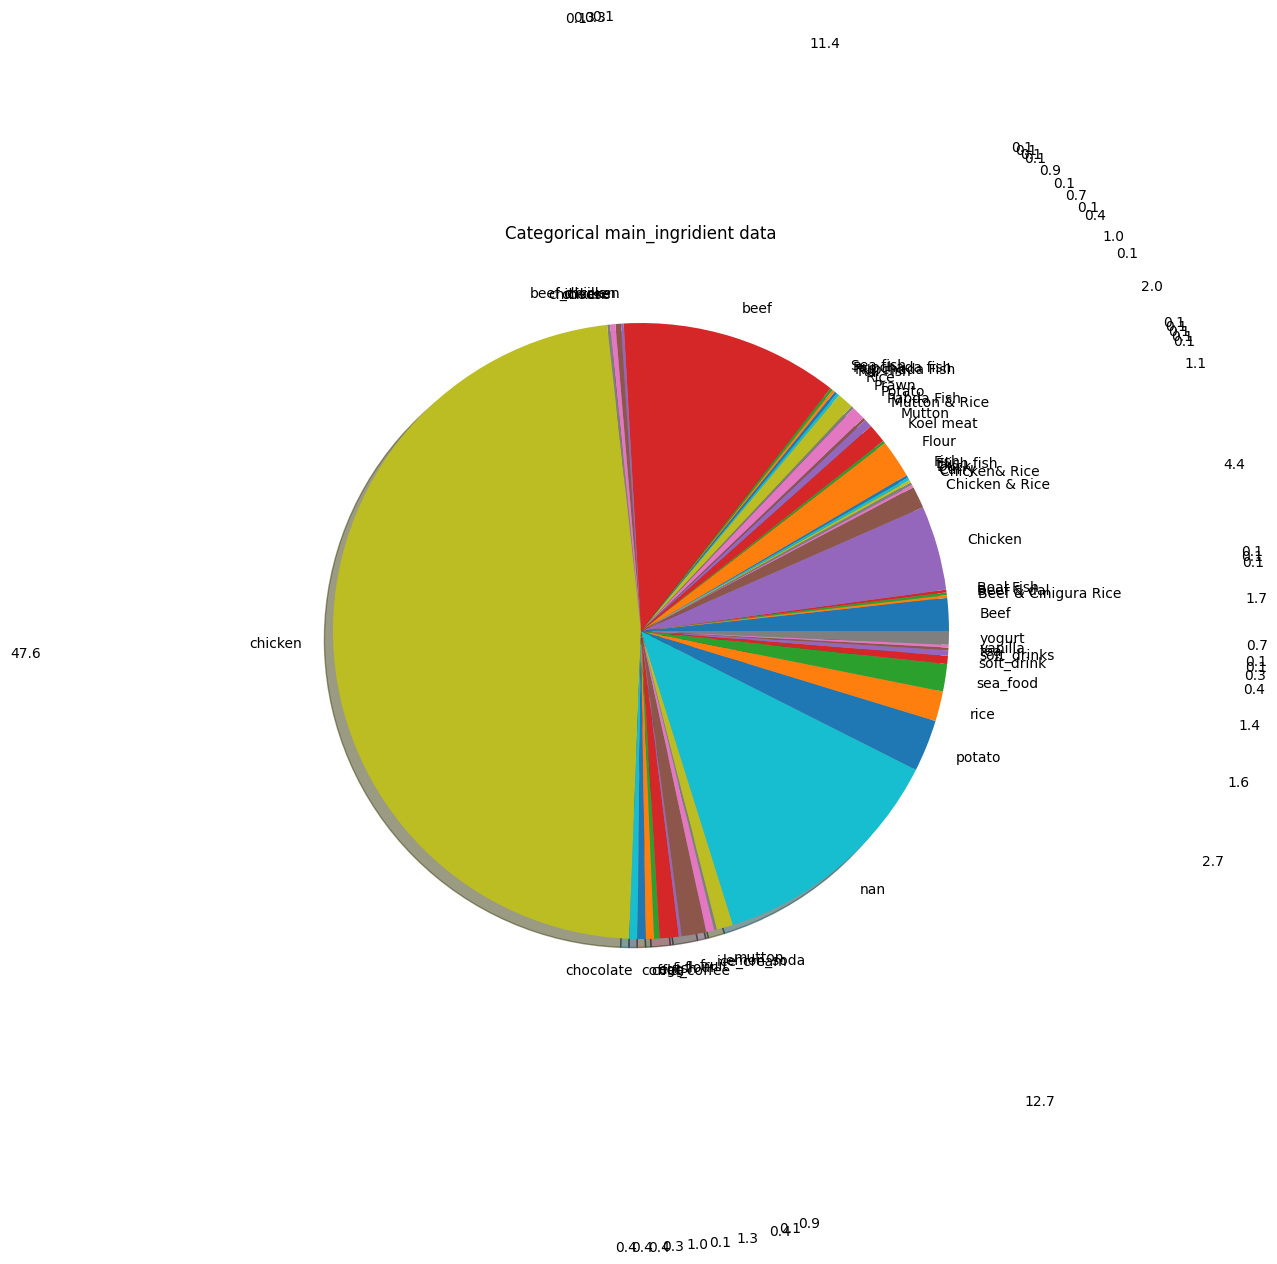

In [81]:
df['main_ingridinet'] = df['main_ingridinet'].astype(str) 
labels, counts = np.unique(df.main_ingridinet, return_counts=True)
print(labels)
plt.figure(figsize=(10,10))
plt.pie(counts,autopct='%1.1f', labels=labels, pctdistance=2, shadow=True, counterclock=True)
plt.title('Categorical main_ingridient data')
plt.show()

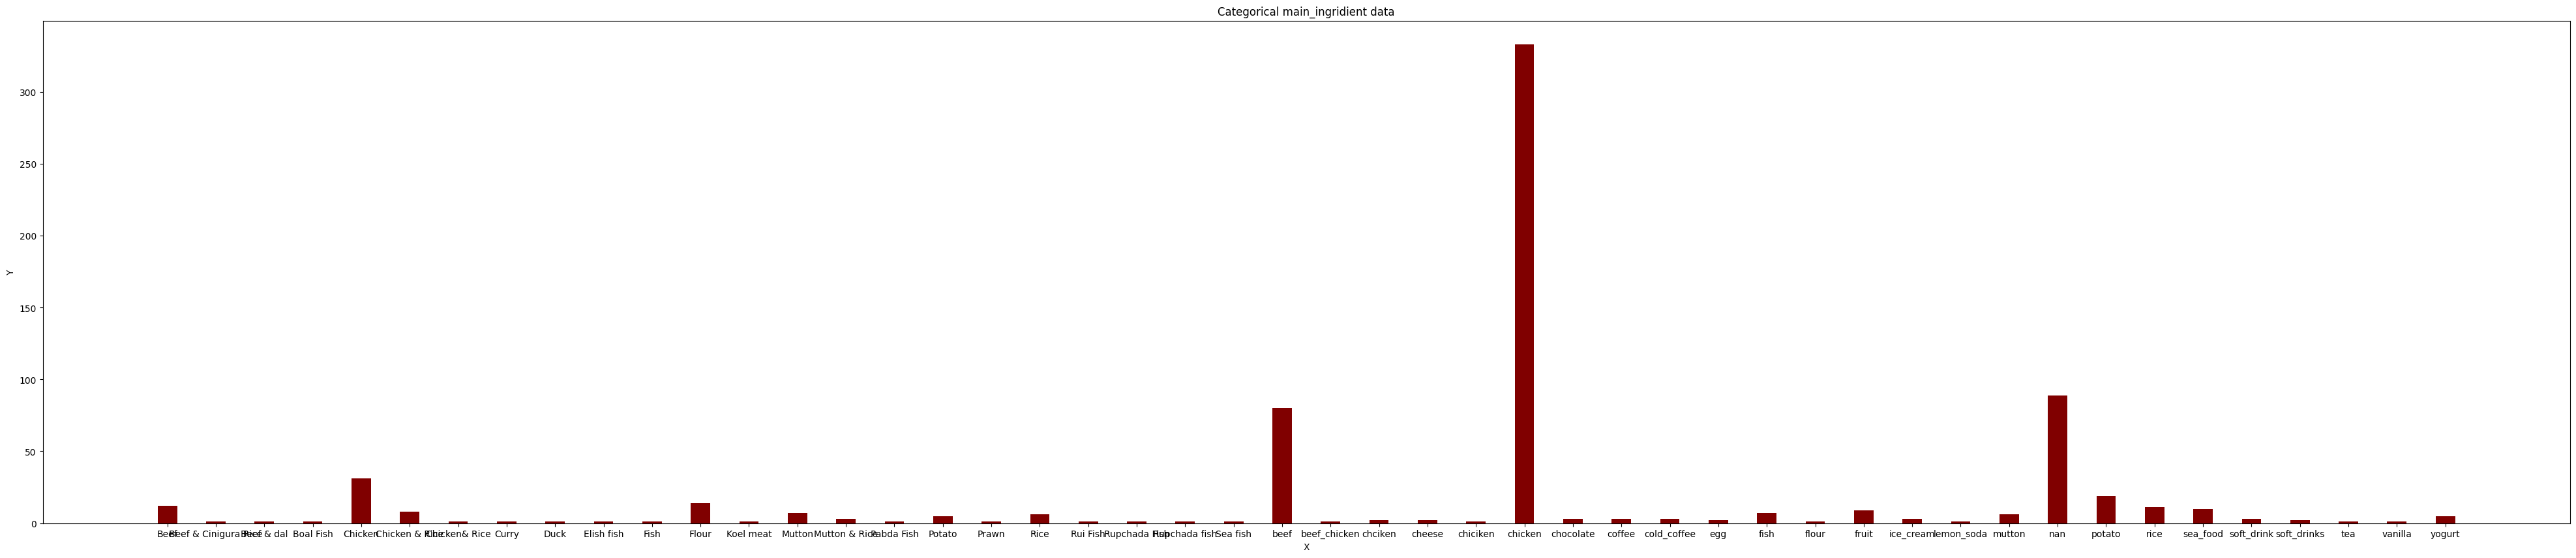

In [82]:
labels, counts = np.unique(df.main_ingridinet, return_counts=True)
plt.figure(figsize=(50,10))
plt.bar(labels, counts, color ='maroon',
        width = 0.4)
plt.xlabel("X")
plt.ylabel("Y")
plt.title('Categorical main_ingridient data')
plt.show()

In [83]:
df.shape

(699, 7)

Label encoding

In [84]:
label_data = df.copy()

applying label encoder to each categorical data columns

In [85]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [86]:
label_encoder = LabelEncoder()
for col in categoric_col:
  label_data[col] = label_encoder.fit_transform(label_data[col])

In [87]:
label_data.head(16)

,food_name,rating,food_price,vendor,location,cuisine_type,main_ingridinet
0,141,3.9,229,28,11,24,23
1,309,3.9,57,28,11,24,32
2,501,4.3,30,29,10,24,34
3,297,4.3,140,29,10,24,28
4,124,4.3,460,31,1,17,38
5,406,4.3,299,31,1,17,28
6,415,4.3,230,31,1,17,38
7,159,4.3,200,31,1,24,23
8,241,4.3,150,31,1,24,28
9,357,4.3,60,31,1,24,23


correlation matrix

In [88]:
corrmat =  label_data.corr()
corrmat

,food_name,rating,food_price,vendor,location,cuisine_type,main_ingridinet
food_name,1.000000,0.001412,0.109419,-0.033853,0.069703,0.552031,0.561401
rating,0.001412,1.000000,0.057736,0.217530,-0.448812,-0.055100,-0.100083
food_price,0.109419,0.057736,1.000000,-0.105871,-0.171598,0.271065,-0.031450
vendor,-0.033853,0.217530,-0.105871,1.000000,-0.245005,0.069782,-0.003680
location,0.069703,-0.448812,-0.171598,-0.245005,1.000000,0.069195,0.103195
cuisine_type,0.552031,-0.055100,0.271065,0.069782,0.069195,1.000000,0.550758
main_ingridinet,0.561401,-0.100083,-0.031450,-0.003680,0.103195,0.550758,1.000000


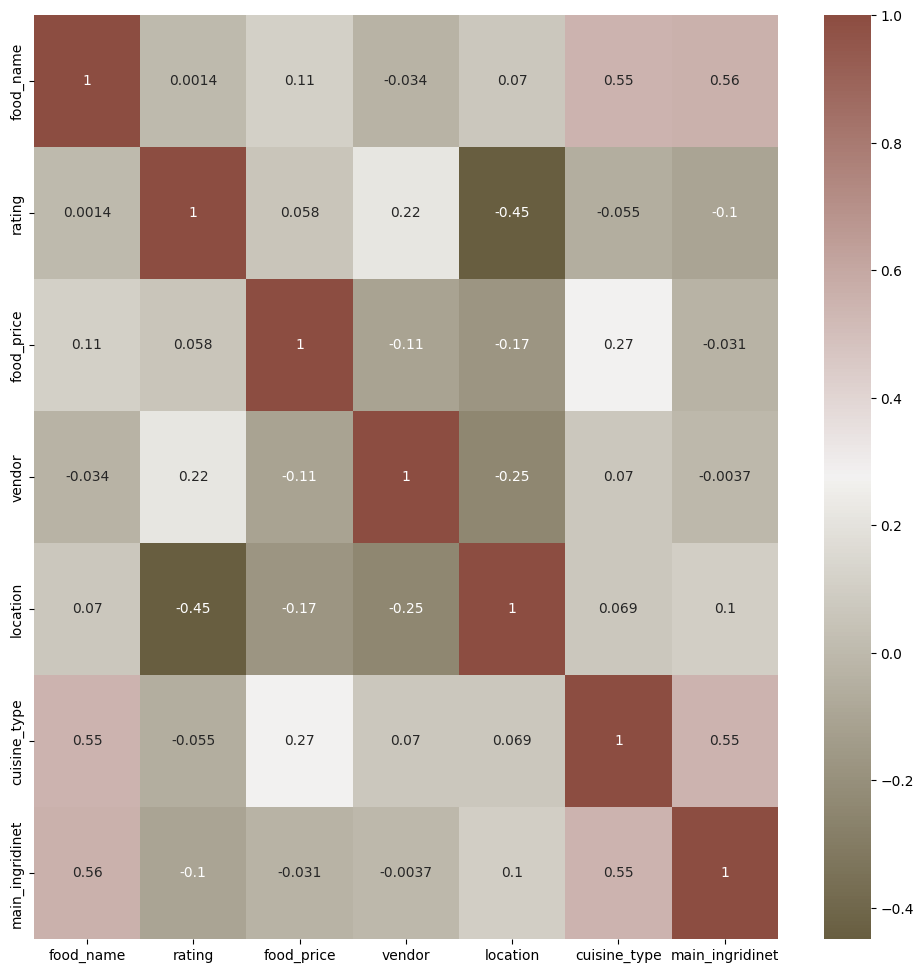

In [89]:
cmap = sns.diverging_palette(70, 20, s = 50, l = 40, n = 6, as_cmap = True)
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat, cmap=cmap, annot=True)
plt.show()

X = features and y = label

In [90]:
X = label_data.drop(["food_price","food_name"], axis = 1)
y = label_data["food_price"]

**Train-Test Spliting**

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

Importing regression models

In [93]:
!pip install xgboost


In [94]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline

Initializing the models

In [95]:
# linear regression
pipeline_lr = ([("scalar1", StandardScaler()), ("lr_classifier", LinearRegression())])

# Decision tree
pipeline_dt = ([("scalar2", StandardScaler()), ("dt_classifier", DecisionTreeRegressor())])

# Random forest
pipeline_rf = ([("scalar3", StandardScaler()), ("rf_classifier", RandomForestRegressor())])

# k nearest neighbor
pipeline_kn = ([("scalar4", StandardScaler()), ("kn_classifier", KNeighborsRegressor())])

# XG boost
pipeline_xgb = ([("scalar5", StandardScaler()), ("xgb_classifier", XGBRegressor())])

In [96]:
# pipeline list
pipelines = [pipeline_lr,pipeline_dt,pipeline_rf,pipeline_kn,pipeline_xgb]

# dict of pipelines and model types
pipe_dict = {0:"LinearRegression", 1:"DecisionTree", 2:"RandomForest", 3:"KNearestNeighbors", 4:"XGBoost"}

for pipe in pipelines:
  pipe_object = Pipeline(pipe)
  pipe_object.fit(X_train, y_train)

In [97]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [98]:
# cross validation score
cv_result_rms = []

for i, pipeline in enumerate(pipelines):
    pipe_object = Pipeline(pipeline)  # Wrap the pipeline in Pipeline class
    cv_score = cross_val_score(pipe_object, X_train, y_train, scoring="neg_root_mean_squared_error")
    cv_result_rms.append(cv_score)
    print(f"{pipe_dict[i]}, {cv_score.mean()}")

LinearRegression, -202.61079311101295
DecisionTree, -142.31653682217157
RandomForest, -134.994357769449
KNearestNeighbors, -166.14383204915444
XGBoost, -137.86384744749944


In [99]:
cv_result_rms

[array([-212.39277527, -274.94960954, -161.62904031, -177.89027444,
        -186.192266  ]),
 array([-138.50851035, -212.88083735, -111.50413962, -129.29002227,
        -119.39917451]),
 array([-134.69475842, -204.474367  , -102.5724684 , -122.68709051,
        -110.54310451]),
 array([-165.819478  , -218.33529507, -140.26887192, -172.99394292,
        -133.30157234]),
 array([-137.88079904, -206.79521845, -103.77301509, -119.89074972,
        -120.97945494])]

In [100]:
# !pip install lazypredict

In [101]:
# from lazypredict.Supervised import LazyRegressor

In [102]:
# # fit lazyregressor

# reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
# models, predictions = reg.fit(X_train, X_test, y_train, y_test)

# print(models)

#### Applying Models

Linear Regression

In [103]:
pipe_lr = Pipeline(pipeline_lr)
pred_lr = pipe_lr.predict(X_test)

Linear Regressor Model Evaluation

In [104]:
print("Linear Regressor Model Evaluation")
print("R^2: ", metrics.r2_score(y_test, pred_lr))
print("Adjust R^2: ", 1-(1-metrics.r2_score(y_test,pred_lr))*(len(y_test)-1)/(len(y_test)))
print("MAE: ", metrics.mean_absolute_error(y_test,pred_lr))
print("MSE: ", metrics.mean_squared_error(y_test,pred_lr))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test,pred_lr)))

Linear Regressor Model Evaluation
R^2:  0.16365160890448116
Adjust R^2:  0.16962552598373482
MAE:  169.2170252136149
MSE:  55591.38543515466
RMSE:  235.7782547970755


In [105]:
# Data

print("Actual Data: ")
print(y_test)
print("predicted data by linear regression: ")
print(pred_lr)

Actual Data: 
158    109
499    399
396    690
155    259
321    225
      ... 
24      70
218    110
431    180
281    240
110    194
Name: food_price, Length: 140, dtype: int64
predicted data by linear regression: 
[242.50653048  90.84131553 511.26705641 254.50301416 345.64419353
 426.00182354 330.47947418 354.4506176  387.25000904 358.59950558
 355.09723309 189.11244073 381.57365962 290.69316847 324.09002513
 189.43918071 212.03268252 271.81310893 283.57298089 358.92581082
 417.56203469 258.79542968 289.68938891 328.28747993 348.64331445
 231.99428008 323.39261027 397.0216912  317.64196644 262.38674374
 304.68644551 228.62165851 167.23450339 277.61159963 312.99014598
 174.02244471 281.68387018 350.19375987 309.76711921 304.68644551
 312.99014598 349.65569758 177.07830316 232.51904328 303.20682905
 324.09002513 237.36311357 417.56203469 328.2147779  224.8367281
 332.43636791 290.69316847 419.69607456 243.88900752 279.9255836
 270.49141205 271.04544953 286.18899638 177.07830316 237.36

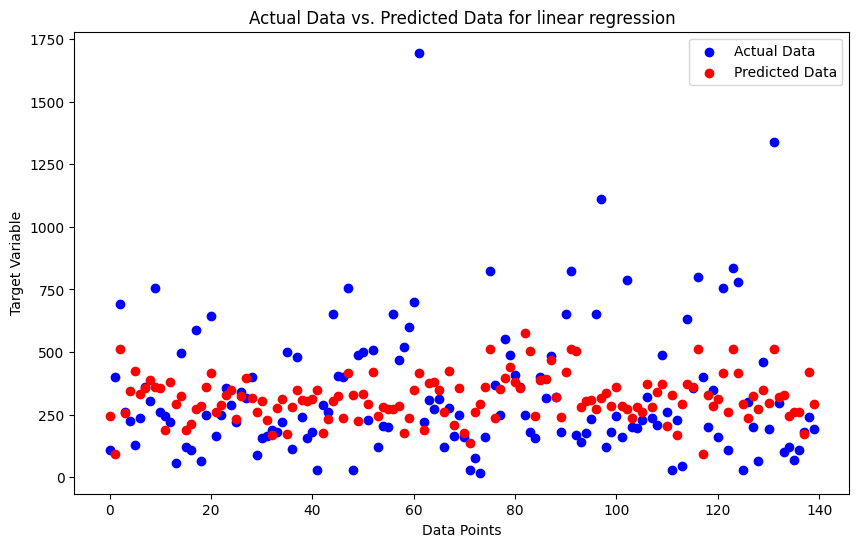

In [106]:
# Plotting the actual data and predicted data
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Data')
plt.scatter(range(len(pred_lr)), pred_lr, color='red', label='Predicted Data')
plt.xlabel('Data Points')
plt.ylabel('Target Variable')
plt.title('Actual Data vs. Predicted Data for linear regression')
plt.legend()
plt.show()

Decission Tree

In [107]:
pipe_dt = Pipeline(pipeline_dt)
pred_dt = pipe_dt.predict(X_test)

Decision Tree Evaluation

In [108]:
print("R^2: ", metrics.r2_score(y_test, pred_dt))
print("Adjust R^2: ", 1-(1-metrics.r2_score(y_test,pred_dt))*(len(y_test)-1)/(len(y_test)))
print("MAE: ", metrics.mean_absolute_error(y_test,pred_dt))
print("MSE: ", metrics.mean_squared_error(y_test,pred_dt))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test,pred_dt)))

R^2:  0.6614082471795342
Adjust R^2:  0.6638267596996803
MAE:  87.09248015873015
MSE:  22505.913608025818
RMSE:  150.01971073170958


In [109]:
# Data

print("Actual Data: ")
print(y_test)
print("predicted data by Decision Tree: ")
print(pred_dt)

Actual Data: 
158    109
499    399
396    690
155    259
321    225
      ... 
24      70
218    110
431    180
281    240
110    194
Name: food_price, Length: 140, dtype: int64
predicted data by Decision Tree: 
[ 99.         399.         875.5        219.         270.
 535.85714286 333.33333333 392.5        300.         755.
 283.         227.5        391.66666667 140.         535.85714286
 140.         110.         489.         141.         352.33333333
 840.71428571 240.         179.6        690.         270.
 201.875      369.         290.         359.         113.85714286
 179.6        195.         187.         182.         305.
 290.         209.77777778 285.         268.         179.6
 305.         171.         285.         210.85714286 650.
 535.85714286 220.         840.71428571  57.         414.
 443.         140.         440.         120.         305.
 145.71428571 650.         219.         285.         220.
 469.         840.71428571 140.         233.5        318.
 288.   

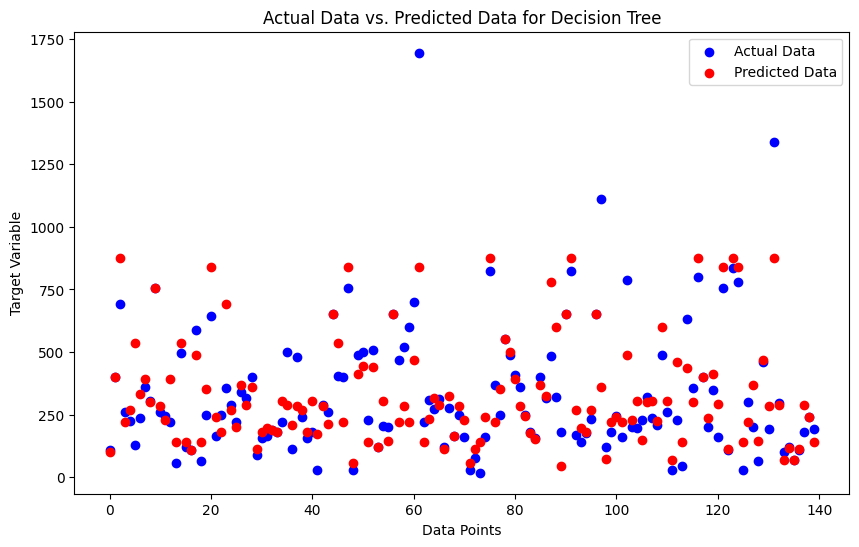

In [110]:
# Plotting the actual data and predicted data
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Data')
plt.scatter(range(len(pred_dt)), pred_dt, color='red', label='Predicted Data')
plt.xlabel('Data Points')
plt.ylabel('Target Variable')
plt.title('Actual Data vs. Predicted Data for Decision Tree')
plt.legend()
plt.show()

Random Forest

In [111]:
pipe_rf = Pipeline(pipeline_rf)
pred_rf = pipe_rf.predict(X_test)

Random Forest Model Evaluation

In [112]:
print("R^2: ", metrics.r2_score(y_test, pred_rf))
print("Adjust R^2: ", 1-(1-metrics.r2_score(y_test,pred_rf))*(len(y_test)-1)/(len(y_test)))
print("MAE: ", metrics.mean_absolute_error(y_test,pred_rf))
print("MSE: ", metrics.mean_squared_error(y_test,pred_rf))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test,pred_rf)))

R^2:  0.6740026043252998
Adjust R^2:  0.6763311571515477
MAE:  86.92486980428046
MSE:  21668.77711101988
RMSE:  147.20318308725487


In [113]:
# Data

print("Actual Data: ")
print(y_test)
print("predicted data by random Forest: ")
print(pred_rf)

Actual Data: 
158    109
499    399
396    690
155    259
321    225
      ... 
24      70
218    110
431    180
281    240
110    194
Name: food_price, Length: 140, dtype: int64
predicted data by random Forest: 
[107.84       391.04       876.7040959  215.04728571 268.75833333
 459.48288731 334.83670274 421.97452381 296.83821429 723.52997902
 281.34237698 228.54214286 388.63262626 140.89984015 543.52070274
 163.18087302 111.65       431.77214286 141.91644048 356.81063631
 833.305307   241.95115704 176.35560281 587.65912698 294.897616
 199.51343504 368.72126984 290.80412698 357.15646825 113.48554227
 171.32902381 198.415      175.74380952 150.88143425 301.98019917
 293.09535714 208.86714541 341.06884921 261.08569048 171.32902381
 301.98019917 177.14535714 287.68149531 210.01143681 650.
 543.52070274 210.85279762 833.305307   152.85935714 413.49069098
 439.64521429 140.89984015 407.04333333 130.63626406 277.21345238
 146.70372883 650.         219.57559621 287.68149531 210.85279762
 469.

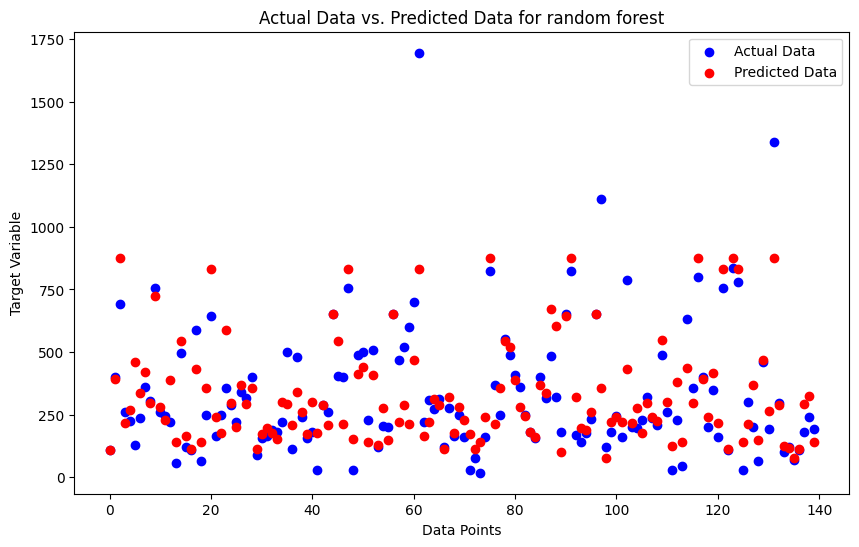

In [114]:
# Plotting the actual data and predicted data
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Data')
plt.scatter(range(len(pred_rf)), pred_rf, color='red', label='Predicted Data')
plt.xlabel('Data Points')
plt.ylabel('Target Variable')
plt.title('Actual Data vs. Predicted Data for random forest')
plt.legend()
plt.show()

K Nearest Neighbor

In [115]:
pipe_kn = Pipeline(pipeline_kn)
pred_kn = pipe_kn.predict(X_test)

K Nearest Neighbor Model Evaluation

In [116]:
print("R^2: ", metrics.r2_score(y_test, pred_kn))
print("Adjust R^2: ", 1-(1-metrics.r2_score(y_test,pred_kn))*(len(y_test)-1)/(len(y_test)))
print("MAE: ", metrics.mean_absolute_error(y_test,pred_kn))
print("MSE: ", metrics.mean_squared_error(y_test,pred_kn))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test,pred_kn)))

R^2:  0.5257357876919129
Adjust R^2:  0.5291233892083993
MAE:  117.9085714285714
MSE:  31523.949714285714
RMSE:  177.54985134965818


In [117]:
# Data

print("Actual Data: ")
print(y_test)
print("predicted data by k nearest neighbor: ")
print(pred_kn)

Actual Data: 
158    109
499    399
396    690
155    259
321    225
      ... 
24      70
218    110
431    180
281    240
110    194
Name: food_price, Length: 140, dtype: int64
predicted data by k nearest neighbor: 
[ 119.   331.  1001.   224.6  281.   334.8  296.   441.   332.   487.8
  311.8  280.   376.   114.2  609.8  174.   111.   258.8  147.8  373.
 1107.8  214.   179.6  446.   281.   200.   327.   297.   301.4  135.
  243.6  258.8  158.8  145.   314.   296.   160.   405.   211.2  243.6
  314.   159.4  285.   216.   534.   609.8  211.6 1107.8  186.6  284.2
  510.4  114.2  324.4  297.6  240.   158.   650.   232.   285.   211.6
  439.  1107.8  174.   205.   318.   328.   135.   299.   224.   311.8
  267.   149.2  135.   114.2  242.  1001.   211.6  373.   357.4  408.
  376.   285.   250.   228.   158.8  335.8  233.   450.   453.   103.
  464.  1001.   891.8  159.8  201.8  211.2  650.   301.4  110.   232.
  242.   232.   258.8  346.   240.   210.   283.   216.2  250.   505.
  305. 

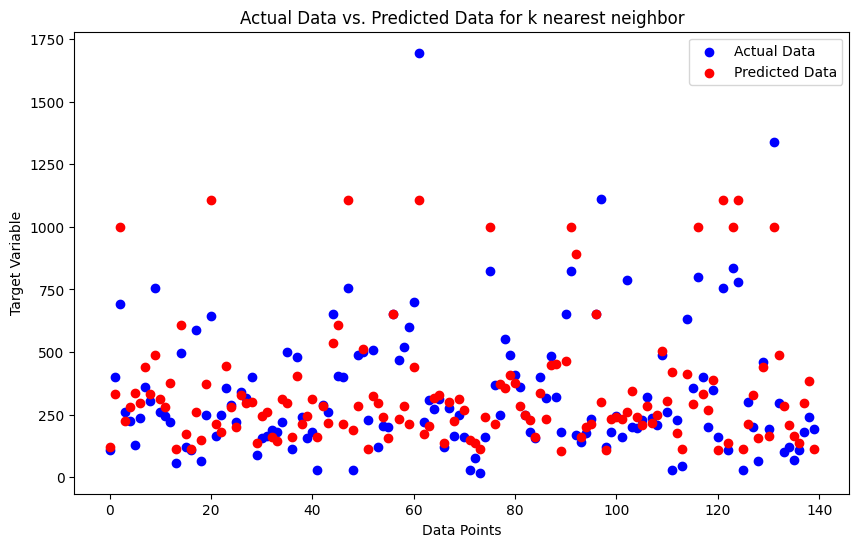

In [118]:
# Plotting the actual data and predicted data
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Data')
plt.scatter(range(len(pred_kn)), pred_kn, color='red', label='Predicted Data')
plt.xlabel('Data Points')
plt.ylabel('Target Variable')
plt.title('Actual Data vs. Predicted Data for k nearest neighbor')
plt.legend()
plt.show()

XGBoost

In [119]:
pipe_xgb = Pipeline(pipeline_xgb)
pred_xgb = pipe_xgb.predict(X_test)

XGB Regressor Model Evaluation

In [120]:
print("R^2: ", metrics.r2_score(y_test, pred_xgb))
print("Adjust R^2: ", 1-(1-metrics.r2_score(y_test,pred_xgb))*(len(y_test)-1)/(len(y_test)))
print("MAE: ", metrics.mean_absolute_error(y_test,pred_xgb))
print("MSE: ", metrics.mean_squared_error(y_test,pred_xgb))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test,pred_xgb)))

R^2:  0.6621992588043213
Adjust R^2:  0.6646121212414333
MAE:  89.24536982945034
MSE:  22453.336423009696
RMSE:  149.8443740118717


In [121]:
# Data

print("Actual Data: ")
print(y_test)
print("predicted data by xgboost regressor: ")
print(pred_xgb)

Actual Data: 
158    109
499    399
396    690
155    259
321    225
      ... 
24      70
218    110
431    180
281    240
110    194
Name: food_price, Length: 140, dtype: int64
predicted data by xgboost regressor: 
[ 99.366615 399.25043  875.3964   216.49452  269.81583  499.4464
 331.9484   394.99237  302.05283  754.4894   280.541    227.37758
 391.54456  140.43552  535.43384  147.33632  111.14112  485.7631
 141.49475  352.21332  840.69775  240.4816   179.95247  678.8349
 324.79514  201.73383  367.54358  290.1316   359.02063  113.83625
 153.1768   253.30869  186.35448  176.49272  304.9387   346.2898
 209.56078  356.38425  269.719    153.1768   304.9387   174.30298
 285.66113  210.74187  691.2925   535.43384  221.68692  840.69775
 177.56981  411.68146  442.49142  140.43552  435.11304   98.43419
 299.31915  145.47678  650.26624  219.13211  285.66113  221.68692
 469.3923   840.69775  147.33632  232.85199  317.7678   289.75095
 113.83625  325.46817  164.85461  280.541    227.30016  218.6

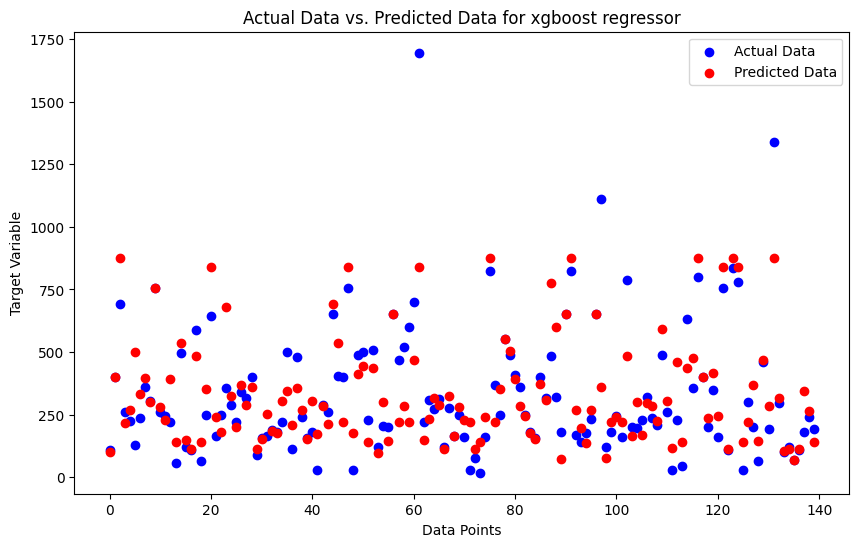

In [122]:
# Plotting the actual data and predicted data
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Data')
plt.scatter(range(len(pred_xgb)), pred_xgb, color='red', label='Predicted Data')
plt.xlabel('Data Points')
plt.ylabel('Target Variable')
plt.title('Actual Data vs. Predicted Data for xgboost regressor')
plt.legend()
plt.show()